Do the following in the wine dataset.
1. Read the dataset to the python environment.
2. Try out different clustering models in the wine dataset.
3. Find the optimum number of clusters in each model and create the model with
the optimum number of clusters.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
data = pd.read_csv(r"C:\Users\user\Downloads\wine.csv")

In [75]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


The datatypes and no. of entries of each column is listed above.

In [77]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

There is no null values in dataset.

In [78]:
#finding statistical properties of dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


# KMeans Clustering

In [79]:
#Normalise
from sklearn.preprocessing import Normalizer
data_new = pd.DataFrame(Normalizer().fit_transform(data), columns=data.columns)

In [80]:
from sklearn.cluster import KMeans

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5893776280459067
0.21097561296654627
0.10306150549665624
0.0591007341301072
0.03969232820057102
0.031232108968648233
0.027180954089528406
0.023664665162120284
0.020448724450857582
0.01853787449801328


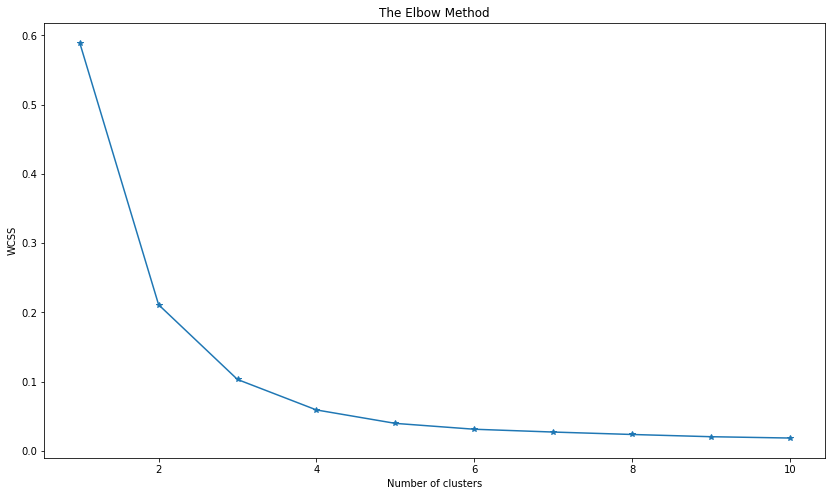

In [81]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++',random_state=42)
    kmeans.fit(data_new)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.figure(figsize = (14,8))
plt.plot(range(1,11),wcss,"-*")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [87]:
#optimal k value is 3
kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=42)
y_kmeans = kmeans.fit(data_new)
kmean_clusters = kmeans.labels_
kmean_clusters

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1,
       2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

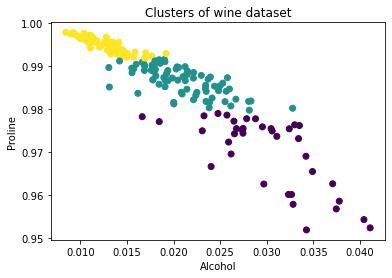

In [88]:
plt.title("Clusters of wine dataset")
plt.scatter(data_new["Alcohol"], data_new["Proline"], c = kmean_clusters)
plt.xlabel("Alcohol")
plt.ylabel("Proline")
plt.show()

# Hierarchial Clustering

In [89]:
#Using the dendrogram to find the optimal number of clusters

import scipy.cluster.hierarchy as sch

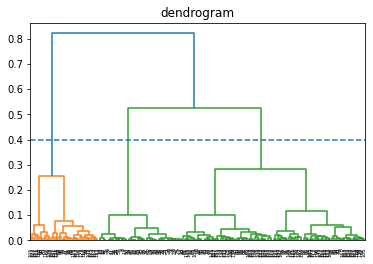

In [85]:
dendrogram = sch.dendrogram(sch.linkage(data_new, method = "ward"))
plt.hlines(0.4, 0, 5000, linestyles="dashed")
plt.title("dendrogram")
plt.show()

using horizontal line we can identifies that the optimun cluster value as 3.

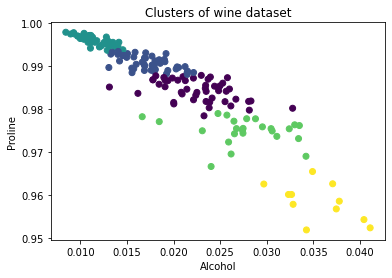

In [86]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3 , affinity = "euclidean" , linkage = "ward")
y_hc = hc.fit(data_new)
hc_clusters = y_hc.labels_
plt.title("Clusters of wine dataset")
plt.scatter(data_new["Alcohol"], data_new["Proline"], c = hc_clusters)
plt.xlabel("Alcohol")
plt.ylabel("Proline")
plt.show()

# PCA

In [90]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns = data_new.columns)
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [91]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 0.95)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)

In [93]:
pca.n_components_

10

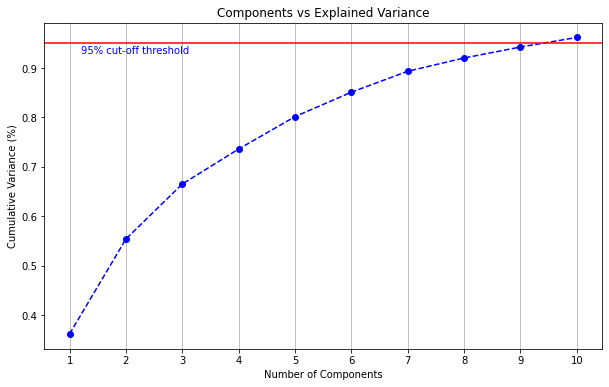

In [96]:
# Plotting the graph of Components vs Explained Variance
plt.figure(figsize = (10, 6))
x = np.arange(1, pca.n_components_+1 , step = 1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.plot(x, y, marker = "o", linestyle = "--", color = "b")
# horizontal line for 95% cutoff threshold
plt.axhline(y = 0.95, color = 'r', linestyle = "-")
plt.text(1.2, 0.93, "95% cut-off threshold", color = 'b', fontsize = 10)
plt.xticks(x)
plt.grid(axis = 'x')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance (%)')
plt.title("Components vs Explained Variance")
plt.show()


In [97]:
pca=PCA(n_components=3)
x_pca=pca.fit_transform(scaled_data)
pcadf=pd.DataFrame(x_pca,columns=["PC1","PC2","PC3"])
pcadf.head()


,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
